<a href="https://colab.research.google.com/github/Winonymous/AI-Hacktober-MLSA/blob/First_project/Project_1/Image_Classification_Winonymous/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Project

In [35]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory # This is adviced in replace of Image Data Generator is depreciated and it those not allow image processing to happen on the GPU
import pandas as pd
import matplotlib.pyplot as plt
import random
import 

# Explore the data

In [12]:
data_dir = "/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data"

for dir, folders, files in os.walk(data_dir):
    print(f"{dir} contains {len(folders)} folders and {len(files)} files")

/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data contains 3 folders and 0 files
/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data/Bungalow contains 0 folders and 229 files
/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data/High-rise contains 0 folders and 72 files
/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data/Storey-building contains 0 folders and 486 files


Hence there are 3 classes <br>
229 images of Bungalow <br>
72 images of High-rise buildings <br>
486 images of Storey-buildings <br>

IMG_20220124_151121.jpeg
ayn_highrise (8).jpeg
MX_SLS_016.jpeg


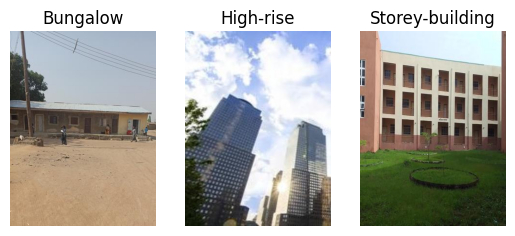

In [51]:
# Define paths for data
class_names = os.listdir(data_dir)

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(1, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}")

# Define Constants

In [13]:
IMAGE_HEIGHT = 160 # The height the image is to be resized to
IMAGE_WIDTH = 160 # The width the image is to be resized to
IMG_SIZE  = (IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 32

# Implement Data Generators and Preprocessing pipeline

**This will create an easy preprocessing pipeline and will help load your data in batches**

In [22]:
print("The Training Dataset")
train_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            label_mode = "categorical",
                                            subset = 'training') # The size of the image

print("The Validation Dataset")
Validation_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            label_mode = "categorical",
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            subset = 'validation') 

The Training Dataset
Found 787 files belonging to 3 classes.
Using 630 files for training.


The Validation Dataset
Found 787 files belonging to 3 classes.
Using 157 files for validation.


# Model architecture

In [65]:
# Define the model architecture
Basemodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Basemodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



# Train the model

In [66]:

Basehistory = Basemodel.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)


Epoch 1/10
20/20 [==============================] - 8s 342ms/step - loss: 412.9405 - accuracy: 0.4444 - val_loss: 4.8742 - val_accuracy: 0.5796
Epoch 2/10
20/20 [==============================] - 7s 341ms/step - loss: 1.0175 - accuracy: 0.6794 - val_loss: 1.5556 - val_accuracy: 0.6242
Epoch 3/10
20/20 [==============================] - 6s 322ms/step - loss: 0.4470 - accuracy: 0.8508 - val_loss: 1.6315 - val_accuracy: 0.6369
Epoch 4/10
20/20 [==============================] - 7s 341ms/step - loss: 0.2188 - accuracy: 0.9238 - val_loss: 1.9747 - val_accuracy: 0.5987
Epoch 5/10
20/20 [==============================] - 7s 335ms/step - loss: 0.1190 - accuracy: 0.9651 - val_loss: 2.9444 - val_accuracy: 0.6433
Epoch 6/10
20/20 [==============================] - 7s 329ms/step - loss: 0.0662 - accuracy: 0.9730 - val_loss: 3.2383 - val_accuracy: 0.6561
Epoch 7/10
20/20 [==============================] - 7s 335ms/step - loss: 0.1115 - accuracy: 0.9730 - val_loss: 2.2429 - val_accuracy: 0.5732
Epoc

# Evaluate the model

In [86]:

Base_loss, Base_acc = Basemodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Base_acc*100:.2f}%')

5/5 - 0s - loss: 4.2456 - accuracy: 0.6369 - 343ms/epoch - 69ms/step
Test accuracy: 63.69%


It looks like the model is overfitting. Lets try to add data Augumentation and see the results

In [81]:
from tensorflow.keras.layers.experimental import preprocessing

Preprocesing_layer = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255.),
    tf.keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
], name = 'Augumentation_layer')

IMG_20210611_070351.jpeg
ay_high_rise (7).jpeg
images (30).jpeg


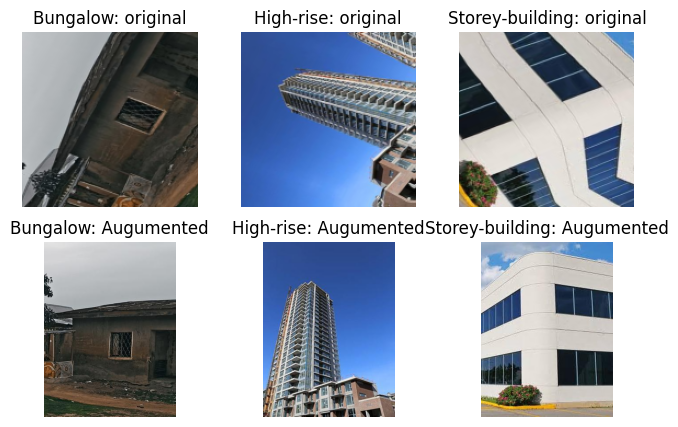

In [82]:
# Lets test it

# Define paths for data
class_names = os.listdir(data_dir)

plt.figure(figsize=(8, 5))

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(2, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(Preprocesing_layer(img))
    plt.axis(False)
    plt.title(f"{cla}: original")
    plt.subplot(2, 3, index + 1 + 3)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}: Augumented")

Seams like the layer is working well lets train a new model

In [92]:
# Define the model architecture
Augmodel = tf.keras.Sequential([
    Preprocesing_layer,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Augmodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



In [93]:

Aughistory = Augmodel.fit(
    train_dataset,
    epochs=20,
    validation_data=Validation_dataset
)


Epoch 1/20
20/20 [==============================] - 8s 349ms/step - loss: 2.3369 - accuracy: 0.5238 - val_loss: 0.9337 - val_accuracy: 0.5860
Epoch 2/20
20/20 [==============================] - 7s 337ms/step - loss: 0.8239 - accuracy: 0.6238 - val_loss: 0.9005 - val_accuracy: 0.5860
Epoch 3/20
20/20 [==============================] - 7s 337ms/step - loss: 0.7712 - accuracy: 0.6444 - val_loss: 1.0424 - val_accuracy: 0.5860
Epoch 4/20
20/20 [==============================] - 7s 340ms/step - loss: 0.7640 - accuracy: 0.6365 - val_loss: 0.9391 - val_accuracy: 0.6051
Epoch 5/20
20/20 [==============================] - 7s 367ms/step - loss: 0.7341 - accuracy: 0.6587 - val_loss: 0.8611 - val_accuracy: 0.6051
Epoch 6/20
20/20 [==============================] - 7s 353ms/step - loss: 0.7428 - accuracy: 0.6619 - val_loss: 0.8499 - val_accuracy: 0.6115
Epoch 7/20
20/20 [==============================] - 7s 356ms/step - loss: 0.7232 - accuracy: 0.6937 - val_loss: 0.9068 - val_accuracy: 0.6178
Epoch 

In [94]:
Aug_loss, Aug_acc = Augmodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Aug_acc*100:.2f}%')

5/5 - 0s - loss: 0.9193 - accuracy: 0.6115 - 362ms/epoch - 72ms/step
Test accuracy: 61.15%


In [27]:
path_to_save_model = 'Model/BaseModel'

# Save the entire model (including architecture, weights, and optimizer state)
model.save(path_to_save_model)

INFO:tensorflow:Assets written to: Model/BaseModel/assets


INFO:tensorflow:Assets written to: Model/BaseModel/assets
